# Principal component analysis 
PCA (Principal component analysis) Is a powerful tool often used in dimensionality reduction.

We will today use PCA to reduce the dimensionality of the Iris dataset from 4d to 2d.

In [2]:
import numpy as np
import sklearn as sk
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# try to import pandas
# if it doesnt exist pip install it 
# if this fails delete it and manuall install pandas(pip install pandas)
try:
    import pandas as pd
except ImportError as e:
    !pip install pandas
    import pandas as pd

%matplotlib inline

# plot data and fit (2d only)
def plot_fit(X, y, clf):
    """
    X = samples
    y = Ground truth
    clf = trained model
    """
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig = plt.figure(1, figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors= "black")
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

In [3]:
# import some data to play with
iris = sk.datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
display(iris_df)
X = StandardScaler().fit_transform(iris_df)
target = iris.target
print ("Number of data points ::", X.shape[0])
print("Number of features ::", X.shape[1])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Number of data points :: 150
Number of features :: 4


## Dimensionality reduction.
To use PCA in practice, simply use the following

```{Python}
pca = PCA(n_components = n )
principalComponents = pca.fit_transform(data_to_transform)

```

In [5]:
###
# Code here
pca = PCA(n_components = 2 )
principalComponents = pca.fit_transform(X)
###


Plot the principal components and compare them to X

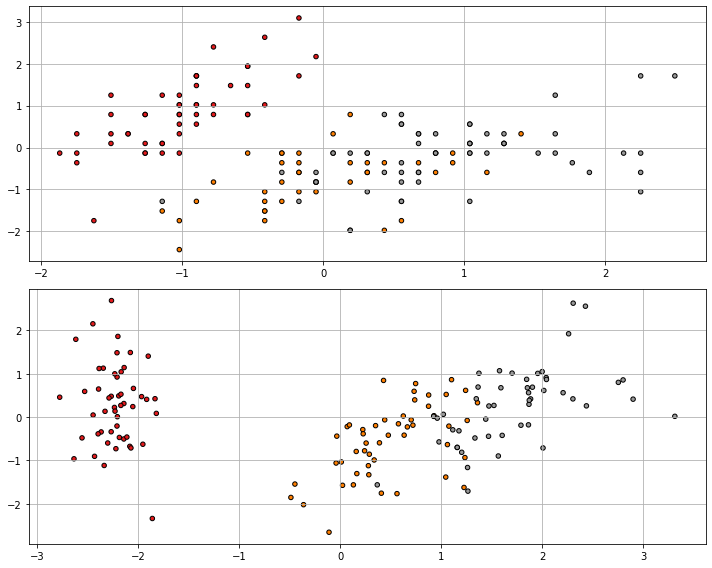

In [8]:
###
# code here
# replace x, y and x1, y1 with the values from your computed pca and your X
###
fig = plt.figure(1, figsize=(10, 8))
ax = plt.subplot(211)
#Plot scaled version
x, y = X[:,0], X[:,1]
g = plt.scatter(x, y, c = target, cmap = plt.cm.Set1, edgecolor = 'black', s = 20)
plt.grid()
plt.subplot(212)

# Plot principal components
x1, y1 = principalComponents[:,0], principalComponents[:,1]
plt.scatter(x1, y1, c = target,cmap = plt.cm.Set1, edgecolor = 'black', s = 20)
plt.grid()
plt.tight_layout()
plt.show()

## Explained Variance
The explained variance tells you how much information (variance) can be attributed to each of the principal components. 

By using the attribute explained_variance_ratio_, you can see that the first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance.

In [10]:
print(pca.explained_variance_ratio_)

print(sum(pca.explained_variance_ratio_))

[0.72962445 0.22850762]
0.9581320720000165


So in total our pca has now expressed 96% of the variance of the dataset.
We can use these new components to attempt to fit a svm like before that should with lower dimensional data retain most of the performance from using the total dataset.

## Exercises
### 1) SVM
Apply a SVM to the principal components. How does it perform compared to using only 2 datapoints pr sample?

## 2) 3 Princepal components
Attempt with 3 principal components. 
How much of the variance of the data does that express? 

Again make a 3d plot where each point is colored respective to the predicted class from your svm.

## 3) Best accuracy
Compare all the different svm's we have run. What is the best accuracy you can achieve. You are also allowed to use different kernels

## 4) Grid search
Attempt with the grid search function built in to **sklearn**
The gridsearch function will try a lot of different parameters for your SVM so you don't have to.
```{Python}
from sklearn.model_selection import GridSearchCV
import numpy as np
    
c = np.logspace(start = -15, stop = 1000, base = 1.02)
param_grid = {'C': c}

grid = GridSearchCV(clf, param_grid = param_grid, cv = 3, n_jobs = -1, scoring = 'accuracy')
grid.fit(X_train, y_train)
```
[documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)


Are you able to get a better fit?

0.8916666666666667
0.9333333333333333


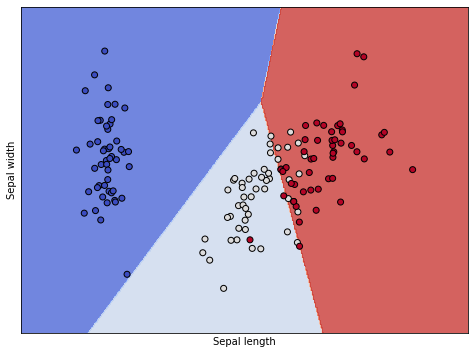

In [12]:
# Exercise 1
X_train, X_test, y_train, y_test = train_test_split(principalComponents, target, test_size=30)

clf = sk.svm.LinearSVC(penalty='l2', loss='squared_hinge', random_state=0, max_iter=10e4)

clf.fit(X_train, y_train) 

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

plot_fit(principalComponents, target, clf)

0.95
0.9


/tmp/ipykernel_21766/2823701699.py:15: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=-150, azim=110)


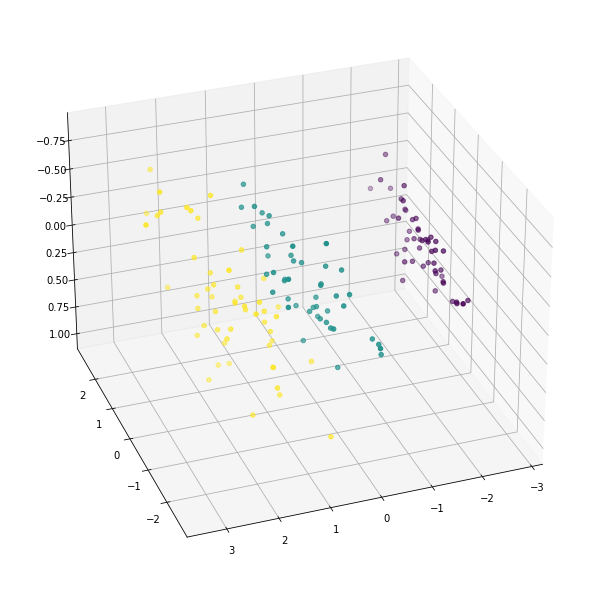

In [15]:
# Exercise 2
pca = PCA(n_components = 3 )
principalComponents = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(principalComponents, target, test_size=30)

clf = sk.svm.LinearSVC(penalty='l2', loss='squared_hinge', random_state=0, max_iter=10e4)

clf.fit(X_train, y_train) 

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

fig = plt.figure(1, figsize=(10, 8))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(principalComponents[:,0], principalComponents[:,1], principalComponents[:,2], c=clf.predict(principalComponents))

In [17]:
# Exercise 3, RBF, 1st place
pca = PCA(n_components = 3 )
principalComponents = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(principalComponents, target, test_size=30)

clf = sk.svm.SVC(kernel='rbf', gamma='auto', C=1)

clf.fit(X_train, y_train) 

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.975
0.9333333333333333


In [19]:
# Exercise 3, Poly, 3rd place
pca = PCA(n_components = 3 )
principalComponents = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(principalComponents, target, test_size=30)

clf = sk.svm.SVC(kernel='poly', degree=3, C=1)

clf.fit(X_train, y_train) 

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9333333333333333
0.8666666666666667


In [1]:
# Exercise 4
from sklearn.model_selection import GridSearchCV

c = np.logspace(start = -15, stop = 1000, base = 1.02)
param_grid = {'C': c}

grid = GridSearchCV(clf, param_grid = param_grid, cv = 3, n_jobs = -1, scoring = 'accuracy')
grid.fit(X_train, y_train)
print(grid.score(X_train, y_train))
print(grid.score(X_test, y_test))

NameError: name 'np' is not defined